In [1]:
import pandas as pd

In [76]:
pred = pd.read_csv('predictions-lambdamart-ferraro-test-sequence.csv')

FileNotFoundError: [Errno 2] File b'predictions-lambdamart-ferraro-test-sequence.csv' does not exist: b'predictions-lambdamart-ferraro-test-sequence.csv'

In [75]:
pred.sort_values(by='sid')


,sid,q_num,doc_id,pred
132,0,0,40d8bea494d4ff4c46f7ad5cb2dcdaa6f96ed5a4,0.138348
124,0,0,4a1472c575488ed9acee6c5481f68b95a0c34092,0.065183
125,0,0,008a2a2c765485af2e035a2572ba9fc1102eabff,0.143297
126,0,0,6b70f398278146116baa4865582c36f5550f953a,0.159967
127,0,0,90605deb1da5e3d5548da12dc130fc0341a6a255,0.224360
128,0,0,dff096df325b4b1022c0ec4b5abd1b0ddaa7b304,-0.074487
129,0,0,34ba4f3d2a38b88153308f2a7f12651b440f5812,-0.051887
130,0,0,c68374b97eb2c214afd3c282175f664fc37c5682,0.226928
131,0,0,efe0b6115d460fcd2173fc04d113694f1ded8692,0.065183
136,0,0,ff8df0745136fb183ea72b783ff38f8a7ad5ceec,0.176671


In [9]:
predsort = pred.sort_values(by=['sid','pred'])

In [57]:
predsort

,sid,q_num,doc_id,pred
128,0,0,dff096df325b4b1022c0ec4b5abd1b0ddaa7b304,-0.074487
129,0,0,34ba4f3d2a38b88153308f2a7f12651b440f5812,-0.051887
124,0,0,4a1472c575488ed9acee6c5481f68b95a0c34092,0.065183
131,0,0,efe0b6115d460fcd2173fc04d113694f1ded8692,0.065183
132,0,0,40d8bea494d4ff4c46f7ad5cb2dcdaa6f96ed5a4,0.138348
125,0,0,008a2a2c765485af2e035a2572ba9fc1102eabff,0.143297
126,0,0,6b70f398278146116baa4865582c36f5550f953a,0.159967
136,0,0,ff8df0745136fb183ea72b783ff38f8a7ad5ceec,0.176671
151,0,0,cbc33164f9db97698901f130f399f2898d856267,0.198834
127,0,0,90605deb1da5e3d5548da12dc130fc0341a6a255,0.224360


In [13]:
prlist_df = predsort.groupby('sid').pred.apply(list).reset_index(name='pred_list')

In [56]:
prlist_df


,sid,pred_list,diffs
0,0,"[-0.07448685647391573, -0.05188655612989922, 0...","[0.022600300344016513, 0.11706955634842169, 0...."
1,1,"[-0.49842682202064, -0.17805973566505184, 0.05...","[0.32036708635558814, 0.22986270381306556, 0.1..."
2,2,"[-0.36823033997215465, -0.3560634211999737, -0...","[0.012166918772180957, 0.05765051093324708, 0...."
3,3,"[-0.4448644060248458, -0.4378880191911314, -0....","[0.006976386833714376, 0.013972977954344601, 0..."
4,4,"[-0.020409248320924715, 0.008953953397480705, ...","[0.02936320171840542, 0.002647092564356971, 0...."
5,5,"[-0.3589724011827904, -0.09610833572461196, 0....","[0.2628640654581784, 0.13349538786773965, 0.00..."
6,6,"[-0.3731603791484235, -0.13142646719996898, -0...","[0.2417339119484545, 0.04036854410478086, 0.01..."
7,7,"[-0.4192521220071137, -0.3806995004954382, -0....","[0.03855262151167549, 0.002052554950060792, 0...."
8,8,"[-0.4575879007481292, -0.4569288198023032, -0....","[0.0006590809458260072, 0.017038823472556308, ..."
9,9,"[-0.4309696749671499, -0.4002062447662692, -0....","[0.03076343020088068, 0.002510735668563413, 0...."


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")


In [29]:
predsort_idx = predsort.groupby('sid',as_index=False).apply(lambda x: x.reset_index(drop = True)).reset_index(level=1)

In [31]:
data = predsort_idx

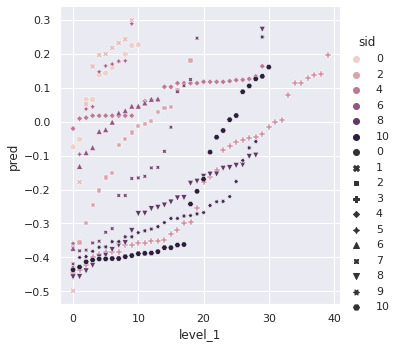

In [33]:
sns.relplot(x="level_1", y="pred", hue="sid", style="sid", data=data);

In [36]:
prlist_df['diffs'] = prlist_df.pred_list.apply(lambda row: [row[i] - row[i-1] for i in range(1,len(row))])

In [37]:
prlist_df

,sid,pred_list,diffs
0,0,"[-0.07448685647391573, -0.05188655612989922, 0...","[0.022600300344016513, 0.11706955634842169, 0...."
1,1,"[-0.49842682202064, -0.17805973566505184, 0.05...","[0.32036708635558814, 0.22986270381306556, 0.1..."
2,2,"[-0.36823033997215465, -0.3560634211999737, -0...","[0.012166918772180957, 0.05765051093324708, 0...."
3,3,"[-0.4448644060248458, -0.4378880191911314, -0....","[0.006976386833714376, 0.013972977954344601, 0..."
4,4,"[-0.020409248320924715, 0.008953953397480705, ...","[0.02936320171840542, 0.002647092564356971, 0...."
5,5,"[-0.3589724011827904, -0.09610833572461196, 0....","[0.2628640654581784, 0.13349538786773965, 0.00..."
6,6,"[-0.3731603791484235, -0.13142646719996898, -0...","[0.2417339119484545, 0.04036854410478086, 0.01..."
7,7,"[-0.4192521220071137, -0.3806995004954382, -0....","[0.03855262151167549, 0.002052554950060792, 0...."
8,8,"[-0.4575879007481292, -0.4569288198023032, -0....","[0.0006590809458260072, 0.017038823472556308, ..."
9,9,"[-0.4309696749671499, -0.4002062447662692, -0....","[0.03076343020088068, 0.002510735668563413, 0...."


In [39]:
diffdf = prlist_df[['sid','diffs']].explode('diffs')

In [77]:
diffdf


,level_1,sid,diffs
0,0,0,0.0226003
0,1,0,0.11707
0,2,0,0
0,3,0,0.0731647
0,4,0,0.00494948
0,5,0,0.0166695
0,6,0,0.016704
0,7,0,0.0221633
0,8,0,0.0255262
0,9,0,0.00256736


In [42]:
diffdf = diffdf.groupby('sid',as_index=False).apply(lambda x: x.reset_index(drop = True)).reset_index(level=1)

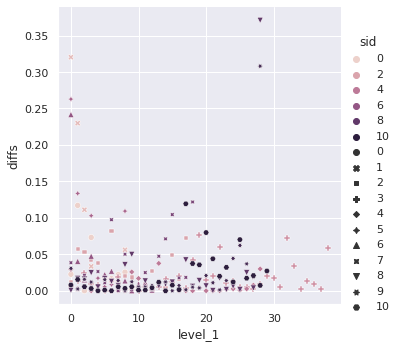

In [43]:
sns.relplot(x="level_1", y="diffs", hue="sid", style="sid", data=diffdf);

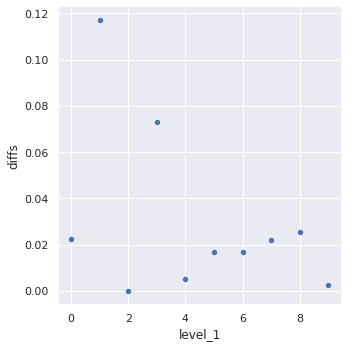

In [49]:
sns.relplot(x="level_1", y="diffs", data=diffdf[diffdf.sid == 0]);

In [50]:
import random

In [51]:
    def mean_diff(rels):
        return (rels[-1] - rels[0]) / len(rels)

In [55]:
diffdf[diffdf.sid == 0]

,level_1,sid,diffs
0,0,0,0.0226003
0,1,0,0.11707
0,2,0,0
0,3,0,0.0731647
0,4,0,0.00494948
0,5,0,0.0166695
0,6,0,0.016704
0,7,0,0.0221633
0,8,0,0.0255262
0,9,0,0.00256736


In [60]:
r = random.Random(0)
predlist = predsort[predsort.sid == 0].pred.to_list()
difflist = diffdf[diffdf.sid == 0].diffs.to_list()
md = mean_diff(predlist)
rlist = [r.uniform(0,md) for i in range(0,len(predlist))]
rlist

[0.02313826623694724,
 0.020768944738966035,
 0.011524212917255623,
 0.007094658541419882,
 0.014009597930089768,
 0.011095726459274778,
 0.021477109334009467,
 0.0083111665056909,
 0.01305938162658766,
 0.01598543301832516,
 0.024883484093766003]

In [61]:
[difflist[i] - rlist[i] for i in range(0,len(difflist))]

[-0.0005379658929307272,
 0.09630061160945565,
 -0.011524212917255623,
 0.06607002166161452,
 -0.009060115474155694,
 0.005573803842324539,
 -0.004773150469919676,
 0.013852172294610707,
 0.012466840629146733,
 -0.013418075493498514]

In [62]:
[rlist[i] - rlist[i-1] for i in range(1,len(rlist))]

[-0.0023693214979812055,
 -0.009244731821710412,
 -0.004429554375835741,
 0.0069149393886698855,
 -0.0029138714708149896,
 0.010381382874734689,
 -0.013165942828318566,
 0.00474821512089676,
 0.0029260513917375008,
 0.008898051075440842]

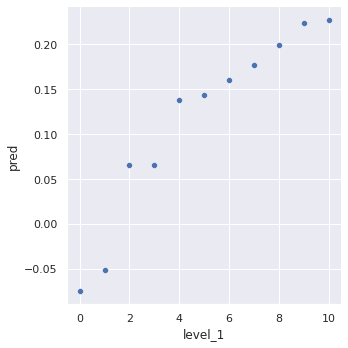

In [63]:
sns.relplot(x="level_1", y="pred",data=data[data.sid == 0]);

In [64]:
sid0 = data[data.sid == 0]

In [66]:
sid0['augm'] = sid0.pred + rlist

/home/pilmus/thesis/venv37/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
sid0

,level_1,sid,q_num,doc_id,pred,augm
0,0,0,0,dff096df325b4b1022c0ec4b5abd1b0ddaa7b304,-0.074487,-0.051349
0,1,0,0,34ba4f3d2a38b88153308f2a7f12651b440f5812,-0.051887,-0.031118
0,2,0,0,4a1472c575488ed9acee6c5481f68b95a0c34092,0.065183,0.076707
0,3,0,0,efe0b6115d460fcd2173fc04d113694f1ded8692,0.065183,0.072278
0,4,0,0,40d8bea494d4ff4c46f7ad5cb2dcdaa6f96ed5a4,0.138348,0.152357
0,5,0,0,008a2a2c765485af2e035a2572ba9fc1102eabff,0.143297,0.154393
0,6,0,0,6b70f398278146116baa4865582c36f5550f953a,0.159967,0.181444
0,7,0,0,ff8df0745136fb183ea72b783ff38f8a7ad5ceec,0.176671,0.184982
0,8,0,0,cbc33164f9db97698901f130f399f2898d856267,0.198834,0.211893
0,9,0,0,90605deb1da5e3d5548da12dc130fc0341a6a255,0.224360,0.240346


In [72]:
melted = sid0[['level_1','pred','augm']].melt(id_vars=['level_1'])
melted

,level_1,variable,value
0,0,pred,-0.074487
1,1,pred,-0.051887
2,2,pred,0.065183
3,3,pred,0.065183
4,4,pred,0.138348
5,5,pred,0.143297
6,6,pred,0.159967
7,7,pred,0.176671
8,8,pred,0.198834
9,9,pred,0.224360


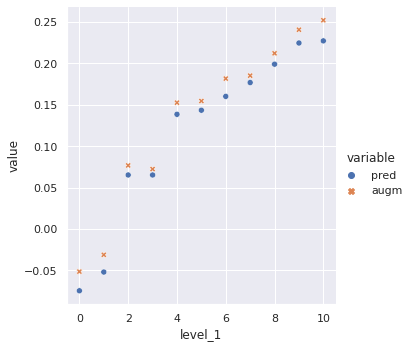

In [73]:
sns.relplot(x="level_1", y="value",hue="variable",style="variable",data=melted);